# Sonar - Mines vs Rocks

The task is to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock. Or simply predict metal or rock objects from sonar return data.

The data set was developed in collaboration with R. Paul Gorman of Allied-Signal Aerospace Technology Center.

Downloaded from: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

## Dataset

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

# Imports

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from numpy import set_printoptions
pd.set_option('display.width', 100)
pd.set_option('precision', 5)

%matplotlib inline

print("Necessary Modules imported Successfully")

Necessary Modules imported Successfully


# Load the dataset

In [2]:
# Load dataset
filename = 'sonar data.csv'
df = pd.read_csv(filename, header=None)
print("DataSet Loaded Successfully")

DataSet Loaded Successfully


We are not specifying the names of the attributes. This is because other than the class attribute (the last column), the variables do not have meaningful names. We also indicate that there is no header information, this is to avoid file loading code taking the first record as the column names.

# Summarize the DataSet

In [3]:
# Dimensions of the dataset
df.shape

(208, 61)

There are 208 Observations and 61 Attributes

In [4]:
#Peek at the Data
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


This does not show all of the columns, but we can see all of the data has the same scale. We can also see that the class attribute (60) has string values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

We can see that all attributes are numeric (float) and that the class value has been read in as an object

In [6]:
# Are there any missing values?
df.isnull().values.any()

False

In [7]:
df.describe().

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.02916,0.02299,0.0015,0.01335,0.02280,0.03555,0.1371
1,208.0,0.03844,0.03296,0.0006,0.01645,0.03080,0.04795,0.2339
2,208.0,0.04383,0.03843,0.0015,0.01895,0.03430,0.05795,0.3059
3,208.0,0.05389,0.04653,0.0058,0.02438,0.04405,0.06450,0.4264
4,208.0,0.07520,0.05555,0.0067,0.03805,0.06250,0.10028,0.4010
5,208.0,0.10457,0.05911,0.0102,0.06703,0.09215,0.13412,0.3823
6,208.0,0.12175,0.06179,0.0033,0.08090,0.10695,0.15400,0.3729
7,208.0,0.13480,0.08515,0.0055,0.08042,0.11210,0.16960,0.4590
8,208.0,0.17800,0.11839,0.0075,0.09703,0.15225,0.23342,0.6828
9,208.0,0.20826,0.13442,0.0113,0.11127,0.18240,0.26870,0.7106


The data has the same range, but interestingly differing mean values. There may be some benefit from standardizing the data.

In [8]:
# Breakdown of the data by the class variable (60)
df.groupby(60).size()

60
M    111
R     97
dtype: int64

In [9]:
# Encode M and R with 1 and 0 
df[60].replace('M', 1, inplace=True)
df[60].replace('R', 0, inplace=True)

In [10]:
#check
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
111,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,1
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,1
142,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,1
173,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,...,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074,1
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033,1
70,0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,...,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,0
71,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,...,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,0
108,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,1
68,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012,0
40,0.0068,0.0232,0.0513,0.0444,0.0249,0.0637,0.0422,0.1130,0.1911,0.2475,...,0.0173,0.0163,0.0055,0.0045,0.0068,0.0041,0.0052,0.0194,0.0105,0


The classes are reasonably balanced between M (mines) and R (rocks)

# Visualize the dataset

## Univariate plots

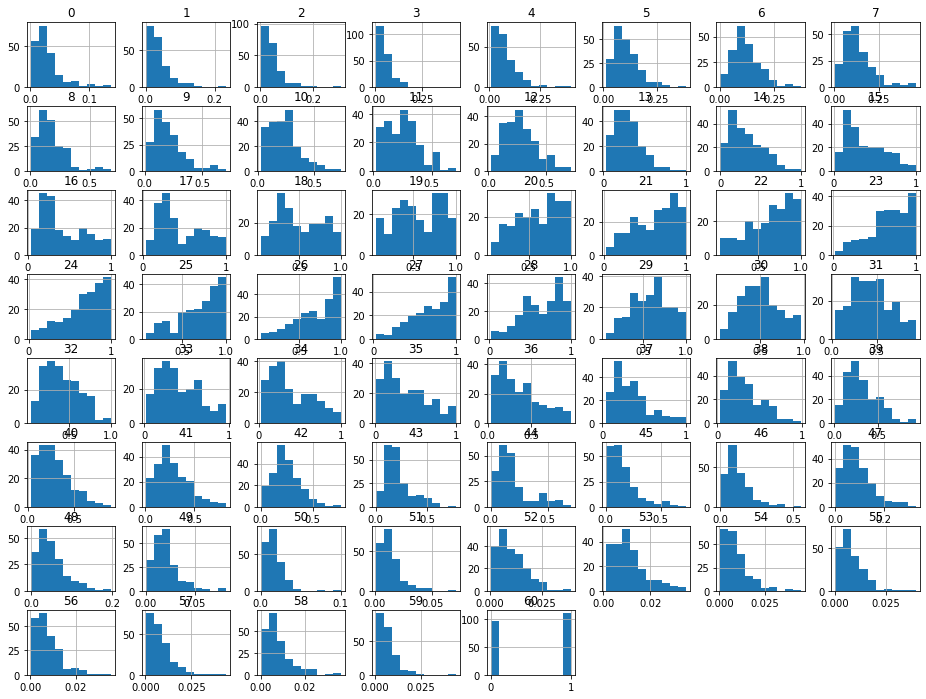

In [11]:
# Histograms
df.hist(figsize=(16,12));

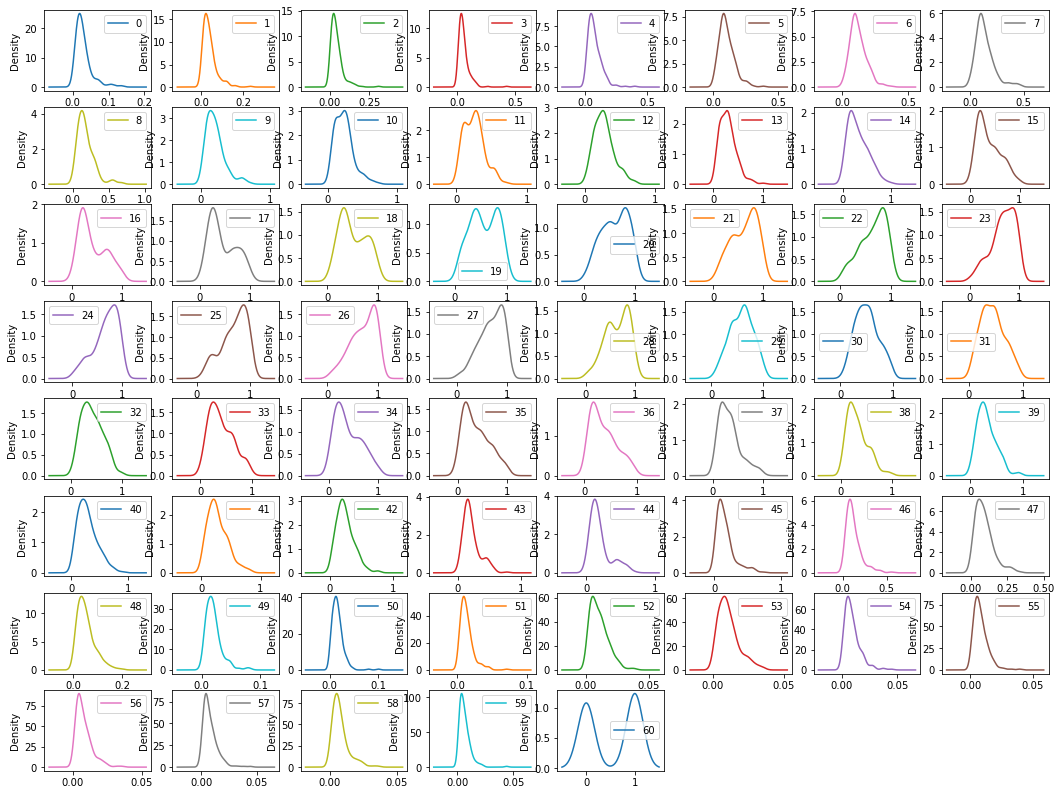

In [12]:
# Density plots
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

Many of the attributes have a skewed distribution. A power transform like a Box-Cox transform that can correct for the skew in distributions might be useful.

## Multivariate plots

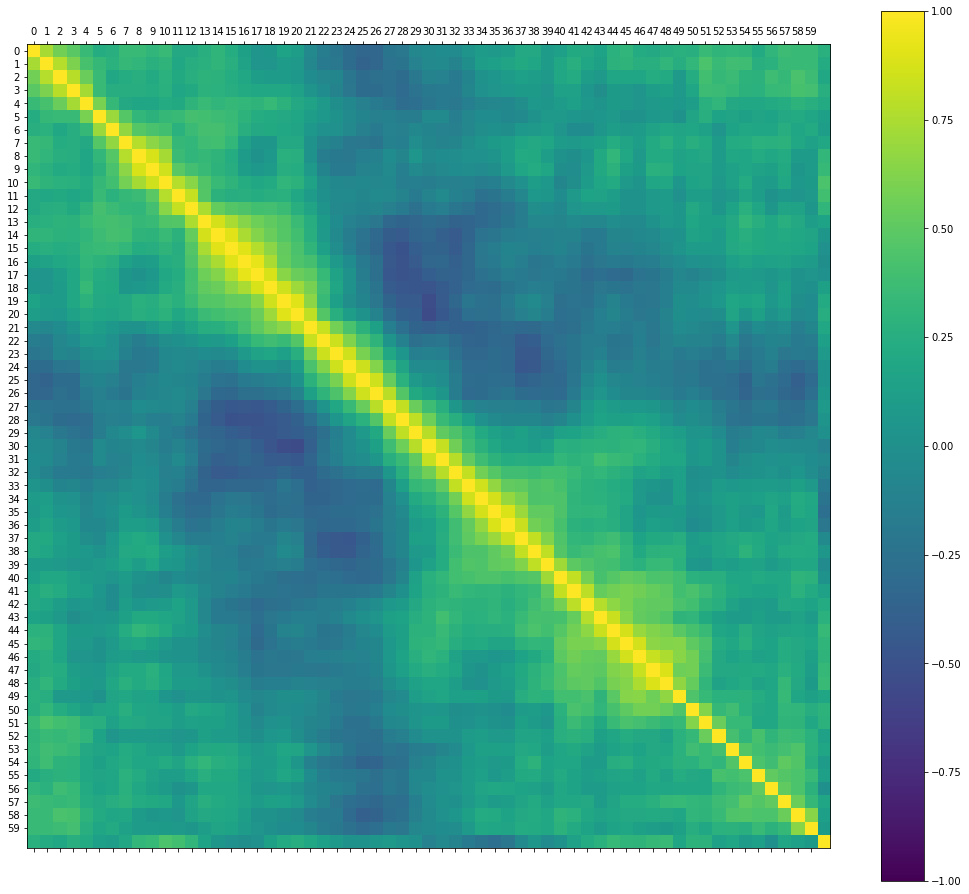

In [13]:
correlations = df.corr()

# Plot correlation matrix
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

It looks like there is also some structure in the order of the attributes. The yellow/light green around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The blue patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

# Test dataset

To confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [14]:
# Separate data into training and validation datasets
arr = df.values
# X = arr[:,0:60]
# y = arr[:,60]
X = df.drop(columns=60, axis=1)
Y = df[60]
print(X)
print(Y)
# test_size = 0.2
# seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

         0       1       2       3       4       5       6       7       8       9   ...      50  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  ...  0.0232   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872  ...  0.0125   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194  ...  0.0033   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264  ...  0.0241   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459  ...  0.0156   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...     ...  ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328  0.2684  ...  0.0203   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030  0.2154  ...  0.0051   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258  0.2529  ...  0.0155   


In [15]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [16]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8       9   ...      50  \
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843  0.2354  ...  0.0181   
110  0.0210  0.0121  0.0203  0.1036  0.1675  0.0418  0.0723  0.0828  0.0494  0.0686  ...  0.0104   
161  0.0305  0.0363  0.0214  0.0227  0.0456  0.0665  0.0939  0.0972  0.2535  0.3127  ...  0.0271   
170  0.0134  0.0172  0.0178  0.0363  0.0444  0.0744  0.0800  0.0456  0.0368  0.1250  ...  0.0046   
184  0.0269  0.0383  0.0505  0.0707  0.1313  0.2103  0.2263  0.2524  0.3595  0.5915  ...  0.0346   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...     ...  ...     ...   
141  0.0707  0.1252  0.1447  0.1644  0.1693  0.0844  0.0715  0.0947  0.1583  0.1247  ...  0.0291   
122  0.0249  0.0119  0.0277  0.0760  0.1218  0.1538  0.1192  0.1229  0.2119  0.2531  ...  0.0140   
68   0.0195  0.0142  0.0181  0.0406  0.0391  0.0249  0.0892  0.0973  0.0840  0.1191  ...  0.0125   


# Model Training --> Logistic Regression 

In [17]:
model = LogisticRegression()

In [18]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

In [19]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [20]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [21]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [22]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8095238095238095


# Model Training --> Decision Tree Classifier

In [23]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=1)

In [24]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Model Evaluation

In [49]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('Accuracy on train data : {0:0.4f}'. format(train_data_accuracy))

Accuracy on train data : 0.8717


In [26]:
# accuracy on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('Accuracy on test data : {0:0.4f}'. format(test_data_accuracy))

# y_pred_train_en = classifier.predict(X_train)
# y_pred_train_en

Accuracy on test data : 0.7143


In [33]:
print("Confusion Matrix : \n {}".format(confusion_matrix(X_test_prediction,y_test)))
print("Classification Report : \n {}".format(classification_report(X_test_prediction,y_test)))

Confusion Matrix : 
 [[ 5  2]
 [ 4 10]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.83      0.71      0.77        14

    accuracy                           0.71        21
   macro avg       0.69      0.71      0.70        21
weighted avg       0.74      0.71      0.72        21



[Text(372.0, 380.52, 'X[10] <= 0.171\nentropy = 0.998\nsamples = 187\nvalue = [88, 99]'),
 Text(223.20000000000002, 271.8, 'X[0] <= 0.039\nentropy = 0.684\nsamples = 66\nvalue = [54, 12]'),
 Text(148.8, 163.07999999999998, 'X[46] <= 0.11\nentropy = 0.469\nsamples = 60\nvalue = [54, 6]'),
 Text(74.4, 54.360000000000014, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(223.20000000000002, 54.360000000000014, 'entropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(297.6, 163.07999999999998, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(520.8000000000001, 271.8, 'X[44] <= 0.264\nentropy = 0.857\nsamples = 121\nvalue = [34, 87]'),
 Text(446.40000000000003, 163.07999999999998, 'X[35] <= 0.55\nentropy = 0.959\nsamples = 89\nvalue = [34, 55]'),
 Text(372.0, 54.360000000000014, 'entropy = 0.806\nsamples = 73\nvalue = [18, 55]'),
 Text(520.8000000000001, 54.360000000000014, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(595.2, 163.07999999999998, 'entropy = 0.0\nsamples = 32

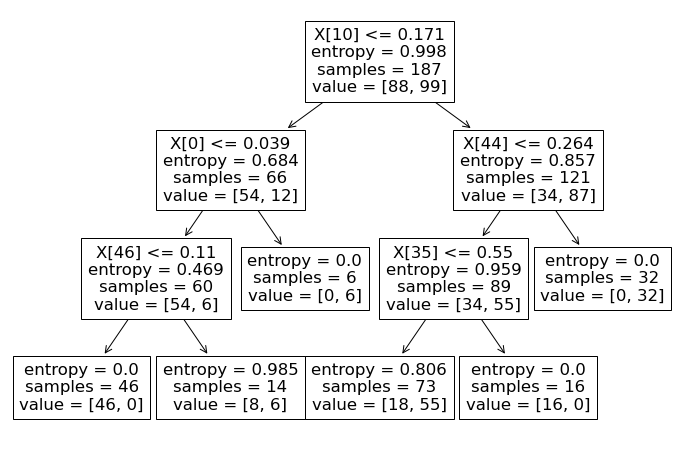

In [32]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(classifier.fit(X_train, y_train))

# Model Training --> KNeighborsClassifier

In [39]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [96]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [97]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

## Model Evaluation

In [98]:
X_train_prediction = knn.predict(X_train)
train_data_accuracy=accuracy_score(y_train,X_train_prediction)
print('Accuracy on train data : {0:0.4f}'. format(train_data_accuracy))

Accuracy on train data : 0.8552


In [99]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)
print("Accuracy on test data : {0:0.4f}".format(test_data_accuracy))

Accuracy on test data : 0.8413


In [100]:
confusion_matrix(y_test, X_test_prediction)

array([[24,  6],
       [ 4, 29]], dtype=int64)

Given our confusion matrix, our model has an accuracy of 53/63 = 84.13%.

# Model Training --> Linear Discriminant Analysis

In [110]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.1)

In [111]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [112]:
x_train_prediction = lda.predict(X_train)
print(accuracy_score(y_train,x_train_prediction))

0.9037433155080213


In [113]:
x_test_prediction = lda.predict(X_test)
print(accuracy_score(y_test,x_test_prediction))

0.8095238095238095


In [114]:
confusion_matrix(y_test,x_test_prediction)

array([[ 6,  3],
       [ 1, 11]], dtype=int64)

Given our confusion matrix, our model has an accuracy of 17/21 = 80.95%.

# Making a Predictive System

In [54]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction=knn.predict(input_data_reshaped)
print(prediction)
if (prediction[0]=='0'):
  print('The object is a Rock')
else:
  print('The object is a mine')



[1]
The object is a mine


In [55]:
# Decision Tree Classifier
dTree=classifier.predict(input_data_reshaped)
print(dTree)
print(type(dTree[0]))
if (dTree[0]=='0'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[1]
<class 'numpy.int64'>
The object is a mine


In [56]:
# Logistic Regression
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]=='0'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[1]
<class 'numpy.int64'>
The object is a mine


In [74]:
# Linear Discriminant Analysis Classifier
dTree=lda.predict(input_data_reshaped)
print(dTree)
print(type(dTree[0]))
if (dTree[0]=='0'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[1]
<class 'numpy.int64'>
The object is a mine
